In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'ENPM703/project/Final'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import glob
import os
import cv2
import numpy as np
import random
import shutil

In [ ]:
def split_dataset(image_folder, train_folder, test_folder, train_ratio=0.8):
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
    random.shuffle(image_files)
    train_size = int(len(image_files) * train_ratio)
    train_files = image_files[:train_size]
    test_files = image_files[train_size:]
    if not os.path.exists(train_folder):
        os.makedirs(train_folder)
    if not os.path.exists(test_folder):
        os.makedirs(test_folder)
    for f in train_files:
        shutil.copy(os.path.join(image_folder, f), os.path.join(train_folder, f))
    for f in test_files:
        shutil.copy(os.path.join(image_folder, f), os.path.join(test_folder, f))

image_folder = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Raw/'
train_folder = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Train/'
test_folder = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Test/'

split_dataset(image_folder, train_folder, test_folder)

image_folder = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Raw/'
train_folder = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Train/'
test_folder = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Test/'

split_dataset(image_folder, train_folder, test_folder)

In [ ]:
augmenter = ImageDataGenerator(
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

imgCount=5

In [ ]:
path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Train/"

for file in os.listdir(path):
    print("Current File:", file)
    img = load_img(os.path.join(path, file))
    img = img_to_array(img)
    img = img.reshape((1,) + img.shape)
    i = 0
    for batch in augmenter.flow(img, batch_size=1,
                              save_to_dir='/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Augmented/', save_prefix='TC_Aug', save_format='png'):
        i += 1
        if i == imgCount:
            break

Current File: TC252_57.png
Current File: TC282_32.png
Current File: TC226_52.png
Current File: TC232_57.png
Current File: TC234_59.png
Current File: TC352_58.png
Current File: TC287_40.png
Current File: TC086_51.png
Current File: TC292_40.png
Current File: TC187_50.png
Current File: TC023_52.png
Current File: TC166_37.png
Current File: TC272_57.png
Current File: TC080_49.png
Current File: TC333_58.png
Current File: TC284_32.png
Current File: TC075_52.png
Current File: TC051_35.png
Current File: TC203_51.png
Current File: TC248_53.png
Current File: TC196_52.png
Current File: TC034_31.png
Current File: TC039_39.png
Current File: TC168_33.png
Current File: TC268_33.png
Current File: TC200_49.png
Current File: TC323_38.png
Current File: TC044_40.png
Current File: TC216_54.png
Current File: TC018_54.png
Current File: TC111_37.png
Current File: TC172_35.png
Current File: TC149_30.png
Current File: TC133_47.png
Current File: TC107_39.png
Current File: TC028_30.png
Current File: TC072_48.png
C

In [ ]:
path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Train/"

for file in os.listdir(path):
    print("Current File:", file)
    img = load_img(os.path.join(path, file))
    img = img_to_array(img)
    img = img.reshape((1,) + img.shape)
    i = 0
    for batch in augmenter.flow(img, batch_size=1,save_to_dir='/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Augmented/', save_prefix='TS_Aug', save_format='png'):
        i += 1
        if i == imgCount:
            break

Current File: TS089_18.png
Current File: TS051_14.png
Current File: TS140_05.png
Current File: TS093_14.png
Current File: TS118_09.png
Current File: TS056_11.png
Current File: TS068_15.png
Current File: TS148_10.png
Current File: TS024_19.png
Current File: TS009_19.png
Current File: TS153_05.png
Current File: TS196_10.png
Current File: TS219_04.png
Current File: TS226_29.png
Current File: TS076_11.png
Current File: TS012_15.png
Current File: TS204_04.png
Current File: TS197_10.png
Current File: TS194_04.png
Current File: TS033_11.png
Current File: TS112_19.png
Current File: TS163_05.png
Current File: TS111_19.png
Current File: TS092_14.png
Current File: TS022_20.png
Current File: TS041_20.png
Current File: TS045_15.png
Current File: TS182_03.png
Current File: TS193_03.png
Current File: TS149_10.png
Current File: TS220_04.png
Current File: TS095_22.png
Current File: TS138_06.png
Current File: TS001_11.png
Current File: TS185_01.png
Current File: TS167_24.png
Current File: TS058_13.png
C

In [ ]:
path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Augmented/"
crop_path = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Cropped/'
imgDim = 224

for file in os.listdir(path):
    print("Current File:", file)

    img = load_img(os.path.join(path, file))
    img = img_to_array(img)

    grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    th, threshed = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY)

    threshed = np.uint8(threshed)

    contours, hierarchy = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cnt = sorted(contours, key=cv2.contourArea)[-1]

    x, y, w, h = cv2.boundingRect(cnt)

    imgCropped = img[y:y + h, x:x + w]

    imgCropped = cv2.resize(imgCropped, (imgDim, imgDim))

    cv2.imwrite(os.path.join(crop_path, 'cropped_' + file), imgCropped, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

Current File: TC_Aug_0_1698.png
Current File: TC_Aug_0_1792.png
Current File: TC_Aug_0_7928.png
Current File: TC_Aug_0_8542.png
Current File: TC_Aug_0_5073.png
Current File: TC_Aug_0_4062.png
Current File: TC_Aug_0_3731.png
Current File: TC_Aug_0_1167.png
Current File: TC_Aug_0_4178.png
Current File: TC_Aug_0_5310.png
Current File: TC_Aug_0_1544.png
Current File: TC_Aug_0_5154.png
Current File: TC_Aug_0_7225.png
Current File: TC_Aug_0_7354.png
Current File: TC_Aug_0_1110.png
Current File: TC_Aug_0_179.png
Current File: TC_Aug_0_3970.png
Current File: TC_Aug_0_6158.png
Current File: TC_Aug_0_468.png
Current File: TC_Aug_0_7019.png
Current File: TC_Aug_0_7366.png
Current File: TC_Aug_0_8960.png
Current File: TC_Aug_0_1453.png
Current File: TC_Aug_0_9417.png
Current File: TC_Aug_0_7382.png
Current File: TC_Aug_0_3873.png
Current File: TC_Aug_0_6136.png
Current File: TC_Aug_0_4249.png
Current File: TC_Aug_0_8810.png
Current File: TC_Aug_0_8898.png
Current File: TC_Aug_0_8965.png
Current Fi

In [ ]:
path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Augmented/"
crop_path = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Cropped/'
imgDim = 224

for file in os.listdir(path):
    print("Current File:", file)

    img = load_img(os.path.join(path, file))
    img = img_to_array(img)

    grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    th, threshed = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY)

    threshed = np.uint8(threshed)

    contours, hierarchy = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cnt = sorted(contours, key=cv2.contourArea)[-1]

    x, y, w, h = cv2.boundingRect(cnt)

    imgCropped = img[y:y + h, x:x + w]

    imgCropped = cv2.resize(imgCropped, (imgDim, imgDim))

    cv2.imwrite(os.path.join(crop_path, 'cropped_' + file), imgCropped, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

Current File: TS_Aug_0_9698.png
Current File: TS_Aug_0_5761.png
Current File: TS_Aug_0_2088.png
Current File: TS_Aug_0_8767.png
Current File: TS_Aug_0_3506.png
Current File: TS_Aug_0_2540.png
Current File: TS_Aug_0_1648.png
Current File: TS_Aug_0_3249.png
Current File: TS_Aug_0_7795.png
Current File: TS_Aug_0_602.png
Current File: TS_Aug_0_7480.png
Current File: TS_Aug_0_7906.png
Current File: TS_Aug_0_1340.png
Current File: TS_Aug_0_2807.png
Current File: TS_Aug_0_8821.png
Current File: TS_Aug_0_2596.png
Current File: TS_Aug_0_2831.png
Current File: TS_Aug_0_6870.png
Current File: TS_Aug_0_8554.png
Current File: TS_Aug_0_6106.png
Current File: TS_Aug_0_4579.png
Current File: TS_Aug_0_5855.png
Current File: TS_Aug_0_155.png
Current File: TS_Aug_0_6637.png
Current File: TS_Aug_0_7773.png
Current File: TS_Aug_0_609.png
Current File: TS_Aug_0_6616.png
Current File: TS_Aug_0_4457.png
Current File: TS_Aug_0_1528.png
Current File: TS_Aug_0_172.png
Current File: TS_Aug_0_1146.png
Current File

In [6]:
path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Test/"
crop_path = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Test_Cropped/'
imgDim = 224

for file in os.listdir(path):
    print("Current File:", file)

    img = load_img(os.path.join(path, file))
    img = img_to_array(img)

    grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    th, threshed = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY)

    threshed = np.uint8(threshed)

    contours, hierarchy = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cnt = sorted(contours, key=cv2.contourArea)[-1]

    x, y, w, h = cv2.boundingRect(cnt)

    imgCropped = img[y:y + h, x:x + w]

    imgCropped = cv2.resize(imgCropped, (imgDim, imgDim))

    cv2.imwrite(os.path.join(crop_path, 'cropped_' + file), imgCropped, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

Current File: TC336_58.png
Current File: TC053_35.png
Current File: TC247_53.png
Current File: TC246_53.png
Current File: TC113_33.png
Current File: TC307_45.png
Current File: TC186_50.png
Current File: TC185_50.png
Current File: TC347_58.png
Current File: TC153_34.png
Current File: TC264_32.png
Current File: TC301_33.png
Current File: TC253_57.png
Current File: TC155_34.png
Current File: TC145_35.png
Current File: TC104_36.png
Current File: TC244_53.png
Current File: TC005_37.png
Current File: TC085_51.png
Current File: TC245_53.png
Current File: TC229_57.png
Current File: TC256_59.png
Current File: TC040_39.png
Current File: TC007_33.png
Current File: TC311_45.png
Current File: TC273_56.png
Current File: TC173_35.png
Current File: TC058_34.png
Current File: TC139_40.png
Current File: TC309_44.png
Current File: TC059_34.png
Current File: TC209_47.png
Current File: TC320_44.png
Current File: TC332_58.png
Current File: TC017_54.png
Current File: TC081_49.png
Current File: TC016_54.png
C

In [7]:
path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Test/"
crop_path = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Test_Cropped/'
imgDim = 224

for file in os.listdir(path):
    print("Current File:", file)

    img = load_img(os.path.join(path, file))
    img = img_to_array(img)

    grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    th, threshed = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY)

    threshed = np.uint8(threshed)

    contours, hierarchy = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cnt = sorted(contours, key=cv2.contourArea)[-1]

    x, y, w, h = cv2.boundingRect(cnt)

    imgCropped = img[y:y + h, x:x + w]

    imgCropped = cv2.resize(imgCropped, (imgDim, imgDim))

    cv2.imwrite(os.path.join(crop_path, 'cropped_' + file), imgCropped, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

Current File: TS165_02.png
Current File: TS085_19.png
Current File: TS142_01.png
Current File: TS127_01.png
Current File: TS040_20.png
Current File: TS189_04.png
Current File: TS216_06.png
Current File: TS063_20.png
Current File: TS014_17.png
Current File: TS206_03.png
Current File: TS113_15.png
Current File: TS072_14.png
Current File: TS132_10.png
Current File: TS190_04.png
Current File: TS160_02.png
Current File: TS235_12.png
Current File: TS124_10.png
Current File: TS208_02.png
Current File: TS123_10.png
Current File: TS007_20.png
Current File: TS174_24.png
Current File: TS176_03.png
Current File: TS034_13.png
Current File: TS129_01.png
Current File: TS031_07.png
Current File: TS125_03.png
Current File: TS188_05.png
Current File: TS171_24.png
Current File: TS232_23.png
Current File: TS015_17.png
Current File: TS091_14.png
Current File: TS028_18.png
Current File: TS011_27.png
Current File: TS050_14.png
Current File: TS067_15.png
Current File: TS168_24.png
Current File: TS213_04.png
C

In [ ]:
path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Cropped/"
preprocess_path = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Prep/'

for file in os.listdir(path):
    print("Current File:", file)

    img = load_img(os.path.join(path, file))
    img = img_to_array(img)
    img = (img / 255.0)
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]
    gray = 0.299 * red + 0.587 * green + 0.114 * blue
    gray = (gray * 255).astype(np.uint8)

    cv2.imwrite(os.path.join(preprocess_path, 'grey_' + file), gray)

Current File: cropped_TC_Aug_0_1698.png
Current File: cropped_TC_Aug_0_1792.png
Current File: cropped_TC_Aug_0_7928.png
Current File: cropped_TC_Aug_0_8542.png
Current File: cropped_TC_Aug_0_5073.png
Current File: cropped_TC_Aug_0_4062.png
Current File: cropped_TC_Aug_0_3731.png
Current File: cropped_TC_Aug_0_1167.png
Current File: cropped_TC_Aug_0_4178.png
Current File: cropped_TC_Aug_0_5310.png
Current File: cropped_TC_Aug_0_1544.png
Current File: cropped_TC_Aug_0_5154.png
Current File: cropped_TC_Aug_0_7225.png
Current File: cropped_TC_Aug_0_7354.png
Current File: cropped_TC_Aug_0_1110.png
Current File: cropped_TC_Aug_0_179.png
Current File: cropped_TC_Aug_0_3970.png
Current File: cropped_TC_Aug_0_6158.png
Current File: cropped_TC_Aug_0_468.png
Current File: cropped_TC_Aug_0_7019.png
Current File: cropped_TC_Aug_0_7366.png
Current File: cropped_TC_Aug_0_8960.png
Current File: cropped_TC_Aug_0_1453.png
Current File: cropped_TC_Aug_0_9417.png
Current File: cropped_TC_Aug_0_7382.png
Cu

In [ ]:
path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Cropped/"
preprocess_path = '/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Prep/'

for file in os.listdir(path):
    print("Current File:", file)

    img = load_img(os.path.join(path, file))
    img = img_to_array(img)
    img = (img / 255.0)
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]
    gray = 0.299 * red + 0.587 * green + 0.114 * blue
    gray = (gray * 255).astype(np.uint8)

    cv2.imwrite(os.path.join(preprocess_path, 'grey_' + file), gray)

Current File: cropped_TS_Aug_0_9698.png
Current File: cropped_TS_Aug_0_5761.png
Current File: cropped_TS_Aug_0_2088.png
Current File: cropped_TS_Aug_0_8767.png
Current File: cropped_TS_Aug_0_3506.png
Current File: cropped_TS_Aug_0_2540.png
Current File: cropped_TS_Aug_0_1648.png
Current File: cropped_TS_Aug_0_3249.png
Current File: cropped_TS_Aug_0_7795.png
Current File: cropped_TS_Aug_0_602.png
Current File: cropped_TS_Aug_0_7480.png
Current File: cropped_TS_Aug_0_7906.png
Current File: cropped_TS_Aug_0_1340.png
Current File: cropped_TS_Aug_0_2807.png
Current File: cropped_TS_Aug_0_8821.png
Current File: cropped_TS_Aug_0_2596.png
Current File: cropped_TS_Aug_0_2831.png
Current File: cropped_TS_Aug_0_6870.png
Current File: cropped_TS_Aug_0_8554.png
Current File: cropped_TS_Aug_0_6106.png
Current File: cropped_TS_Aug_0_4579.png
Current File: cropped_TS_Aug_0_5855.png
Current File: cropped_TS_Aug_0_155.png
Current File: cropped_TS_Aug_0_6637.png
Current File: cropped_TS_Aug_0_7773.png
Cu

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, AveragePooling2D,MaxPooling2D
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score
from numpy import interp
import matplotlib.pyplot as plt
import time

import numpy as np
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam



import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.regularizers import l2
from PIL import Image

In [ ]:
TC_path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TC/Cropped/"
TS_path = "/content/drive/MyDrive/ENPM703/Project/Final/Dataset/TS/Cropped/"

filepaths = []
labels = []
for filename in os.listdir(TC_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        filepaths.append(os.path.join(TC_path, filename))
        labels.append('TC')

for filename in os.listdir(TS_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        filepaths.append(os.path.join(TS_path, filename))
        labels.append('TS')

eye_df = pd.DataFrame({"filepath": filepaths, "label": labels})

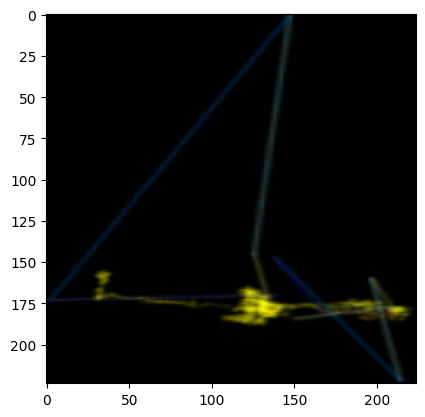

In [ ]:
image_path = eye_df['filepath'][500]
image = plt.imread(image_path)
plt.imshow(image)
plt.show()

In [ ]:
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    return image

In [ ]:
X_processed = [preprocess_image(image_path) for image_path in eye_df['filepath']]
X = tf.stack(X_processed)
X = preprocess_input(X.numpy())
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(eye_df['label'])

In [ ]:
import pickle
with open('/content/drive/MyDrive/ENPM703/Project/Final/data.pkl', 'wb') as file:
    pickle.dump((X, y), file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'ENPM703/project/Final'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, AveragePooling2D,MaxPooling2D
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score
from numpy import interp
import matplotlib.pyplot as plt
import time

import numpy as np
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, precision_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam



import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.regularizers import l2
from PIL import Image

In [ ]:
import pickle
with open('/content/drive/MyDrive/ENPM703/Project/Final/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [ ]:
nfolds = 5
nEpochs = 30
nBatch= 16

In [ ]:
kfold = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1)
tprs = []
aucs = []
recall = []
precision = []
mean_fpr = np.linspace(0, 1, 100)

start = time.time()
hists_CNN = []

for train_idx, test_idx in kfold.split(X, y):
    model = Sequential([
        Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(16, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Conv2D(32, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.20),

        Flatten(),

        Dense(256, activation='relu'),
        Dropout(0.50),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.001)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    hist = model.fit(X[train_idx], y[train_idx], validation_, epochs=nEpochs, batch_size=nBatch, verbose=1)

    pred = model.predict(X[test_idx]).ravel()

    recall.append(recall_score(y[test_idx], pred.round()))
    precision.append(precision_score(y[test_idx], pred.round()))

    fpr, tpr, thresholds = roc_curve(y[test_idx], pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    print(f"ROC AUC: {roc_auc}")
    aucs.append(roc_auc)
    hists_CNN.append(hist)

end = time.time()

print("Avg AUC:", np.mean(aucs))
print("Avg Recall:", np.mean(recall))
print("Avg Precision:", np.mean(precision))
print("Training Time:", end - start, "seconds.")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.6298 - loss: 62.7534 - val_accuracy: 0.0000e+00 - val_loss: 7.3286
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7268 - loss: 6.8377 - val_accuracy: 0.0024 - val_loss: 6.3169
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7527 - loss: 5.8885 - val_accuracy: 0.0000e+00 - val_loss: 5.6427
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7410 - loss: 5.2412 - val_accuracy: 0.0000e+00 - val_loss: 5.1903
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7461 - loss: 4.7438 - val_accuracy: 0.0000e+00 - val_loss: 4.8931
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7453 - loss: 4.3250 - val_accuracy: 0.0098 - val_loss: 4.7716
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7412 - loss: 3.9686 - val_accuracy: 0.0024 - val_loss: 4.8381
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7546 - loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.6509 - loss: 38.8379 - val_accuracy: 0.0000e+00 - val_loss: 6.3369
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7359 - loss: 5.9214 - val_accuracy: 0.0000e+00 - val_loss: 5.3891
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7410 - loss: 5.0629 - val_accuracy: 0.0000e+00 - val_loss: 4.7993
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7360 - loss: 4.5018 - val_accuracy: 0.0000e+00 - val_loss: 4.3584
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7560 - loss: 4.0466 - val_accuracy: 0.0000e+00 - val_loss: 4.0395
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7493 - loss: 3.7010 - val_accuracy: 0.0000e+00 - val_loss: 3.8651
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7510 - loss: 3.3734 - val_accuracy: 0.0122 - val_loss: 3.6896
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7367

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.6373 - loss: 57.1061 - val_accuracy: 0.0000e+00 - val_loss: 6.9619
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7535 - loss: 6.5631 - val_accuracy: 0.0000e+00 - val_loss: 6.1112
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7302 - loss: 5.7614 - val_accuracy: 0.0000e+00 - val_loss: 5.4975
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7294 - loss: 5.1744 - val_accuracy: 0.0000e+00 - val_loss: 5.0446
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7364 - loss: 4.6976 - val_accuracy: 0.0000e+00 - val_loss: 4.6830
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7334 - loss: 4.3246 - val_accuracy: 0.0000e+00 - val_loss: 4.3439
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7481 - loss: 3.9659 - val_accuracy: 0.0000e+00 - val_loss: 4.0584
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.6554 - loss: 54.0091 - val_accuracy: 0.0000e+00 - val_loss: 6.6649
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7346 - loss: 6.2593 - val_accuracy: 0.0000e+00 - val_loss: 5.9173
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7452 - loss: 5.5183 - val_accuracy: 0.0000e+00 - val_loss: 5.3878
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7444 - loss: 4.9867 - val_accuracy: 0.0000e+00 - val_loss: 4.8728
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7606 - loss: 4.5367 - val_accuracy: 0.0000e+00 - val_loss: 4.5064
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7644 - loss: 4.1698 - val_accuracy: 0.0000e+00 - val_loss: 4.1969
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7428 - loss: 3.8555 - val_accuracy: 0.0000e+00 - val_loss: 4.0103
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ROC AUC: 0.4553191826892569
Epoch 1/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.6661 - loss: 30.4357 - val_accuracy: 0.0000e+00 - val_loss: 6.4170
Epoch 2/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7359 - loss: 6.0039 - val_accuracy: 0.0000e+00 - val_loss: 5.4838
Epoch 3/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7321 - loss: 5.1027 - val_accuracy: 0.0000e+00 - val_loss: 4.8587
Epoch 4/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7369 - loss: 4.4869 - val_accuracy: 0.0000e+00 - val_loss: 4.4101
Epoch 5/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7463 - loss: 3.9783 - val_accuracy: 0.0000e+00 - val_loss: 4.0594
Epoch 6/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7390 - loss: 3.5857 - val_accuracy: 0.0000e+00 - val_loss: 3.7532
Epoch 7/30
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7499 - loss: 3.2313 - val_accuracy: 0.0000e+00 - val_loss: 3.5002
Epoch 8/30
103/103 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


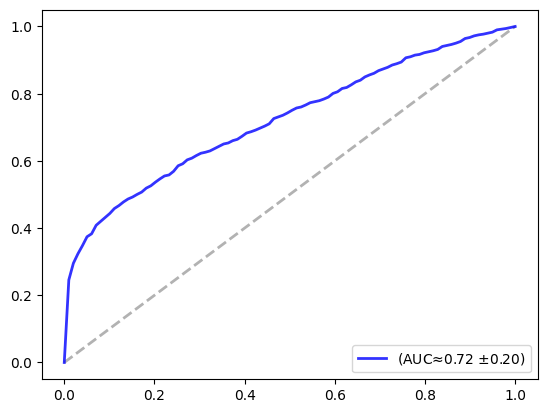

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',alpha=0.3)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'(AUC≈%0.2f $\pm$%0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
plt.legend(loc="lower right")